# Statistics

In [21]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

The **field of statistics**, which is the practice and study of collecting and analyzing data. 

A **summary statistic**, which is a fact about or summary of some data, like an average or a count.

With the power of statistics we can answer a lot of questions.

There are 2 types of statistics:
- **Descriptive**: describe and summarize data at hand
- **Inferential**: uses sample data to make inferences about a larger population

## Types of data:
- **Numerical** (quantitative):
    - Continuous
    - Discrete
- **Categorical** (qualitative):
    - Nominal (Unordered)
    - Ordinal (Ordered)


## Measures of center

- **Mean**: sum/#
- **Median**: value in the middle once sorted
- **Mode**: value most frequent

<Axes: ylabel='Count'>

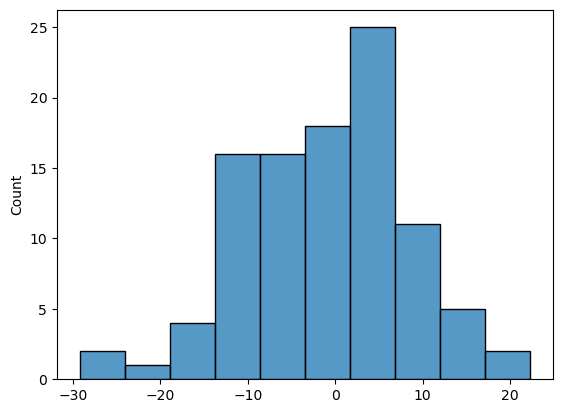

In [2]:
numbers = np.random.normal(0,10,100)
sns.histplot(numbers)

In [3]:
np.mean(numbers)

-1.155849072670689

In [4]:
np.median(numbers)

0.496910074294471

In [5]:
_1_to_6 = pd.Series([1,2,3,4,5,6])
rolls = _1_to_6.sample(50, replace=True)
rolls.mode()

0    2
1    6
dtype: int64

In [6]:
import statistics

statistics.mode(rolls)

2

Median is better when the data is skewed, since the mean assumes symmetry in the distribution of the data and the median is more robust regarding outliers.

## Measures of spread

**Variance**: average of the sum of the squared distances to the mean

**Standard deviation**: sqrt of variance. Easier to understand since the units as the same as the original values, not squared as for variance.

In [ ]:
# The ddof=0 applies to whole populations, not samples.
np.var(numbers, ddof=1)

In [ ]:
np.std(numbers, ddof=1)

**Mean Absolute Deviation** is an alternative to the standard deviation (same unit as the distribution and doesnt penalize larger distances), but its less common.

**Quantiles**: value splitting the sorted sample   

In [ ]:
np.quantile(numbers, 0.1)

In [ ]:
#quartiles
np.quantile(numbers, [0, 0.25, 0.5, 0.75, 1])

In [ ]:
import matplotlib.pyplot as pyplot
plt.boxplot(numbers)
plt.show()

Boxplots use quartiles

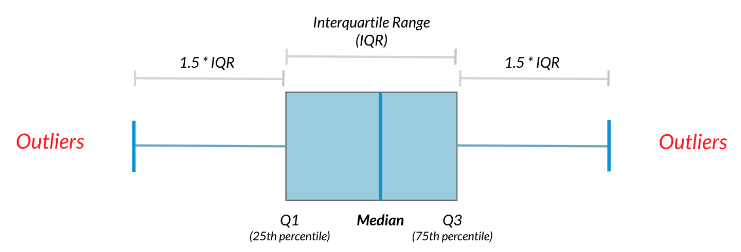

In [ ]:
# Using linspace to calculate quantiles:

np.quantile(numbers, np.linspace(0,1,5))

**Interquantile range (IQR)** is another measure of spread. Its the distance between the 3 and 2nd quartile.

In [8]:
np.quantile(numbers, 0.75)-np.quantile(numbers, 0.25)

12.08499638150225

In [7]:
from scipy.stats import iqr
iqr(numbers)

12.08499638150225

### Outliers

Data points substantially different from the others.

A common way to identify them is to calculate the IQR and flag as outliers every data point further from the 1st or 3rd more than 1.5 times the IQR. Represented by the whiskers in the box plot.

## Probability

The probability of an event is the number of ways the event can happen divided by the total number of possible outcomes.

Probability is always between 0 and 1.

Events can by dependent or independent (the probability of the second one is not affected by the outcome of the first one.)



In [12]:
np.random.seed(10)

people = pd.Series(["Yo", "Tu", "El"])

people.sample(1)

0    Yo
2    El
dtype: object

In [13]:
people.sample(2)

2    El
1    Tu
dtype: object

In [14]:
people.sample(4, replace=True)

0    Yo
1    Tu
0    Yo
1    Tu
dtype: object

# Introduction to distributions

Taken from https://campus.datacamp.com/courses/introduction-to-statistics-in-python

### Expected value of a distribution
The expected value of a distribution is the mean of a probability distribution

### RVS

Generates random numbers from a scipy.stats distribution

### PPF

### Cumulative Distribution Function (cdf)

### Probability Mass Function (pmf)


---
## Discrete Distributions

They describe probabilities for discrete outcomes, like counting stuff.

---
## Discrete Uniform Distribution

Special type of discrete distribution where all the different outcomes have the same probability. Like the result of rolling a die.

They can be represented with barplots.

The probability can be calculated summing the area below what we are interested.

The law of large numbers: as the size of your sample increases, the sample mean will approach the population mean

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

In [16]:
die = pd.DataFrame({'number': [1,2,3,4,5,6], 'prob':[1/6,1/6,1/6,1/6,1/6,1/6]})
die

,number,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


In [17]:
die.mean()

number    3.500000
prob      0.166667
dtype: float64

The expectation of the distribution is 3.5

In [19]:
rolls_10 = die.sample(10, replace=True)
rolls_10

,number,prob
4,5,0.166667
3,4,0.166667
0,1,0.166667
4,5,0.166667
3,4,0.166667
0,1,0.166667
3,4,0.166667
2,3,0.166667
1,2,0.166667
0,1,0.166667


(array([4., 1., 3., 2., 0.]),
 array([1. , 2.2, 3.4, 4.6, 5.8, 7. ]),
 <BarContainer object of 5 artists>)

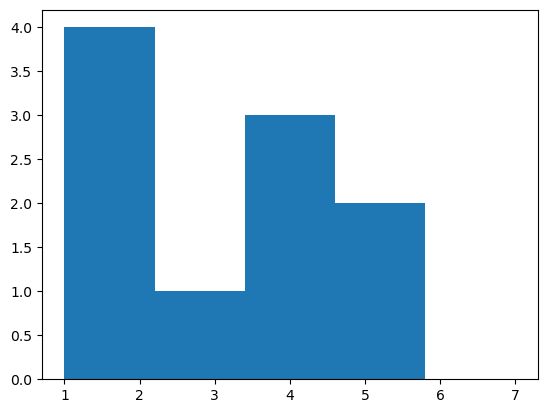

In [24]:
plt.hist(rolls_10.number, bins=np.linspace(1,7,6))

In [26]:
rolls_10.mean()

number    3.000000
prob      0.166667
dtype: float64

In [27]:
die.sample(100, replace=True).mean()

number    3.240000
prob      0.166667
dtype: float64

In [28]:
die.sample(1000, replace=True).mean()

number    3.443000
prob      0.166667
dtype: float64

In [29]:
die.sample(10000, replace=True).mean()

number    3.490700
prob      0.166667
dtype: float64

**The Law of large numbers** as the size of your sample increases the sample mean will approach the expected value

---
## Continuous Uniform Distribution

In [30]:
from scipy.stats import uniform

In [31]:
# Calculate the probability of waiting 7 minutes or less when the waiting time is uniform between 0 and 12 minutes
uniform.cdf(7, 0, 12)

0.5833333333333334

In [32]:
# more than 7 minutes
1-uniform.cdf(7, 0, 12)

0.41666666666666663

In [33]:
#To generate random numbers according to the uniform distribution:
# Ten values between 0 and 1
uniform.rvs(0,1,10)

array([0.06395166, 0.30186589, 0.3672753 , 0.26315278, 0.25587465,
       0.1536125 , 0.24553386, 0.4028757 , 0.60578473, 0.54673444])

---
## Binomial Distribution (Discrete)

The outcomes of the experiment are known and their probabilities are known too.

Probability distribution of the number of successes in a sequence of **independent** trials.

It can be described using n (total number of trials) and p (probability of success)

In [ ]:
from scipy.stats import binom

binom.rvs(# of coins, probability of heads/success, size=# of trials)

In [ ]:
binom.rvs(1, 0.5, size=10)

In [ ]:
# Calculating the probability of 7 heads
binom.pmf(7, 10, 0.5)

In [ ]:
# Calculating the probability of 7 heads or less
binom.cdf(7, 10, 0.5)

The **exppected value** is n*p

---
## Normal Distribution

- The bell curve
- Symmetrical
- The area beneath the curve is 1 as any other probability distribution
- The probability never hits 0
- The normal distribution is described by its mean and standar deviation
- The special normal distribution called **standard normal distribution** is the one with mean 0 and standard deviation 1
- The **68-95-99,7 rule**
  - 68% of the area is 1 standard deviation from the mean
  - 95% of the area is 2 standard deviations from the mean
  - 99.7% of the area is 3 standard deviations from the mean
- Lots of real world data follow the normal distribution


In [ ]:
from scipy.stats import norm

# Calculating the area before 154 on a normal distribution with mean 161 and standard deviation 7
norm.cdf(145,161,7) 

In [ ]:
# To calculate the area to the right of a given value, 1 - 
1 - norm.cdf(145,161,7) 

In [ ]:
# To calculate precentiles, we pass the percentile on 1 format and the mean and sorted
norm.ppf(0.9, 161, 7)

In [ ]:
# To generate random numbers
norm.rvs(161,7, size=10)

### The Central Limit Theorem (CLT)
A distribution of a summary statistic like the means of several dice rolls is called a **sampling distribution**. This distribution, specifically, is a sampling distribution of the sample mean.

**The central limit theorem**: A sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases.

Samples have to be randomly taken and each take has to be independent.

The mean, proportion, standard deviation, etc follow this.

The mean of the sampling distribution can be used as an estimate of the characteritics of the underlying distribution. Very convenient when dealing with large populations.

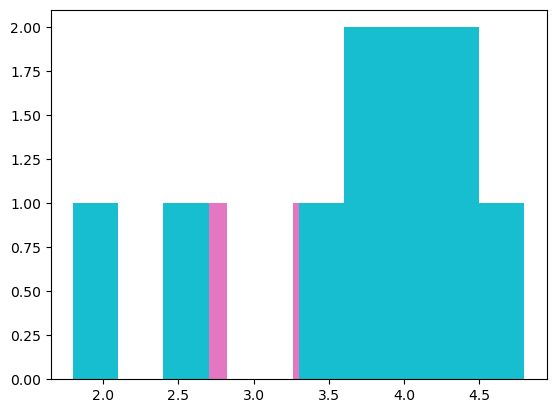

In [45]:
means = []
for i in range(10):
    means.append(die['number'].sample(5, replace=True).mean())
    plt.hist(means)

plt.show()

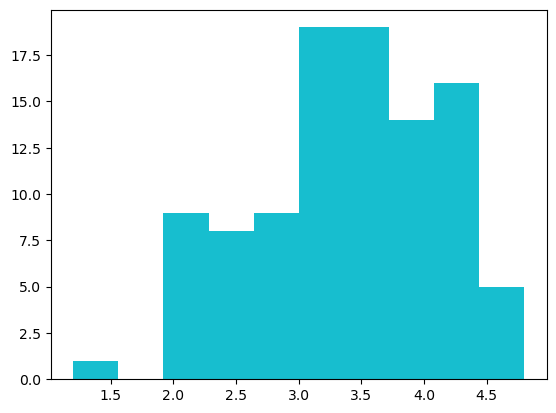

In [44]:
means = []
for i in range(100):
    means.append(die['number'].sample(5, replace=True).mean())
    plt.hist(means)

plt.show()

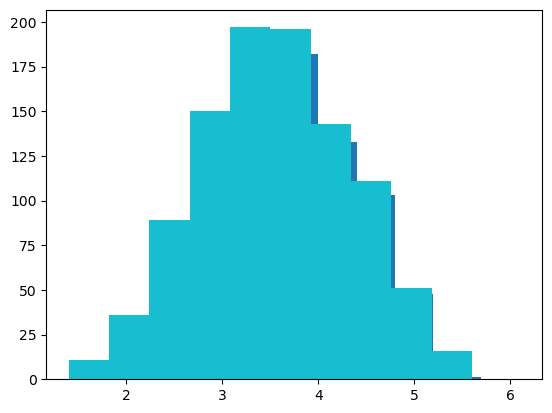

In [46]:
means = []
for i in range(1000):
    means.append(die['number'].sample(5, replace=True).mean())
    plt.hist(means)

plt.show()

---
## Poisson Distribution (Discrete)

A Poisson process is a process where events appear to happen at a certain rate, but completely at random. The time unit is irrelevant, but has to be consistent.

The Poisson distribution describes the probability of some number of events happening over a fixed period of time.

The Poisson distribution is described by $\lambda$, which represents the average number of events per time period.
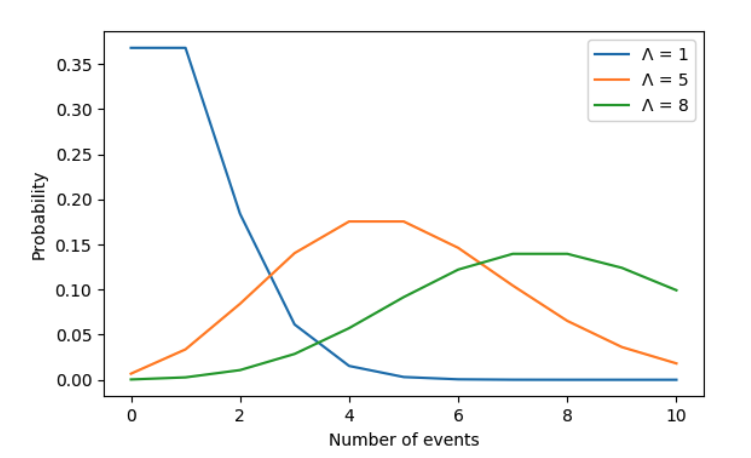

In [47]:
from scipy.stats import poisson

# Given that the average number of adoptions per week is 8, what's the probability of 5 adoptions in a week? 
poisson.pmf(5, 8)

0.09160366159257921

In [ ]:
# To get the probability of 5 or less, lets use the cdf method
poisson.cdf(5, 8)

In [ ]:
# For the probability of greater than x
1-poisson.cdf(5, 8)

In [ ]:
# We can perform sampling on a poisson distribution by using the method rvs:
poisson.rvs(8, size=10)

**The central limit theorem also applies**

---
## Exponential Distribution

represents the probability of a certain time passing between Poisson events.
It also uses lambda, that represents the rate, similar to the one in Poisson. Here we prefer expressing it as how much time between events.

The exponential distribution is continuous (it represents time).

So lambda in Poisson could be 0.5 events per minute

In the exponential distributionm that would mean 1 event every 2 minutes.

In [ ]:
from scipy.stats import expon

# Probability of waiting less than 1 minute when the expected waiting time is 2
# The 2, comes from 1/0.5
expon.cdf(1, scale=2)

In [ ]:
#Probability of waiting more than 4 minutes:
1-expon.cdf(4, 2)

In [ ]:
#Probability of having to wait between 1 and 4 minutes:
expon.cdf(4,2) - expon.cdf(1,2)

---
## Student's t distribution

Its shape is similar to the normal distribution, but t's tails are thicker.
Ts distribution has a parameter called df (degrees of freedom), where lower df means thicker tails, or higher standard deviation.


---
## Log-normal distribution

For variable whose logarithm is normally distributed.
They are skewed, not like the normal distribution.



---
## Correlation

Scatterplots help visualizing relationships between variables.

On the x axis we show the explanatory or independent variable. On the y axism the response or dependent variable

The correlation coefficient quantifies the linear relationship between 2 variables. It goes from -1 to 1. Its magnitude corresponds to the strength of the relationship. The sign corresponds to the direction of the relationship.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

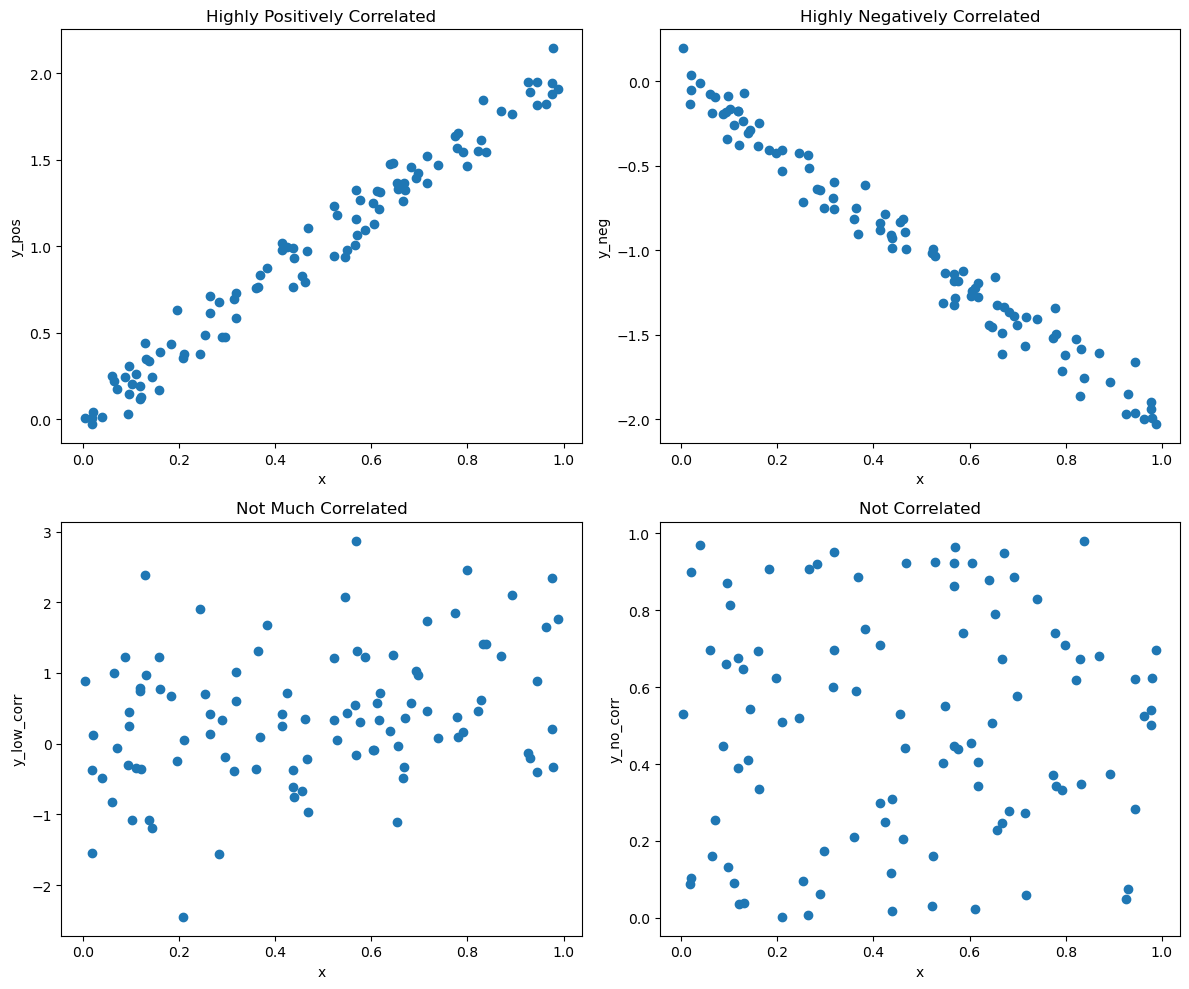

In [50]:
np.random.seed(0)
size = 100  # Sample size

x = np.random.rand(size)

y_pos = 2 * x + np.random.normal(0, 0.1, size)  # y is positively correlated with x
df_pos = pd.DataFrame({'x': x, 'y_pos': y_pos})

y_neg = -2 * x + np.random.normal(0, 0.1, size)  # y is negatively correlated with x
df_neg = pd.DataFrame({'x': x, 'y_neg': y_neg})

y_low_corr = x + np.random.normal(0, 1, size)  # y is somewhat correlated with x
df_low_corr = pd.DataFrame({'x': x, 'y_low_corr': y_low_corr})

y_no_corr = np.random.rand(size)  # y is not correlated with x
df_no_corr = pd.DataFrame({'x': x, 'y_no_corr': y_no_corr})

df = pd.concat([df_pos, df_neg['y_neg'], df_low_corr['y_low_corr'], df_no_corr['y_no_corr']], axis=1)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(df['x'], df['y_pos'])
plt.title('Highly Positively Correlated')
plt.xlabel('x')
plt.ylabel('y_pos')

plt.subplot(2, 2, 2)
plt.scatter(df['x'], df['y_neg'])
plt.title('Highly Negatively Correlated')
plt.xlabel('x')
plt.ylabel('y_neg')

plt.subplot(2, 2, 3)
plt.scatter(df['x'], df['y_low_corr'])
plt.title('Not Much Correlated')
plt.xlabel('x')
plt.ylabel('y_low_corr')

plt.subplot(2, 2, 4)
plt.scatter(df['x'], df['y_no_corr'])
plt.title('Not Correlated')
plt.xlabel('x')
plt.ylabel('y_no_corr')

plt.tight_layout()
plt.show()

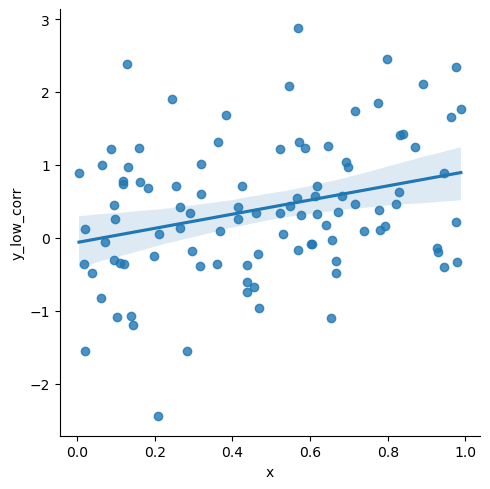

In [51]:
import seaborn as sns

#adding a trend line
sns.lmplot(x='x', y='y_low_corr', data=df)


In [ ]:
#adding a trend line with no confidence intervals
sns.lmplot(x='x', y='y_low_corr', data=df, ci=None)


In [ ]:
df

In [ ]:
# In order to calculate the correltation between two variables
df['x'].corr(df['y_neg'])

Correlation is simmetrical

In [ ]:
print(f"df['x'].corr(df['y_neg']) {df['x'].corr(df['y_neg']):2f} is the same as df['y_neg'].corr(df['x']) {df['y_neg'].corr(df['x']):2f}")

The Pearson product-moment correlation ($r$) is the most commonly used.

There are yet, caveats when using correlations:
- Correlation doent apply when the relationship is not lineal. Viseualize the data to confirm this assumption.
- When the data is highly skewed we can apply log transformations
- Other transformations are sqrt or 1/x. The choose of this transformations depends on the data itself and how skewed it is.
- Transformations can be combined.

These transformations are useful in many statistical methods like correlation coefficient, linear regression, etc.

**Correlation does not imply causation**

The misleading correlations are called *spurious* correlations.

A phenomenon called **confounding** can end up with these *spurious* correlations.

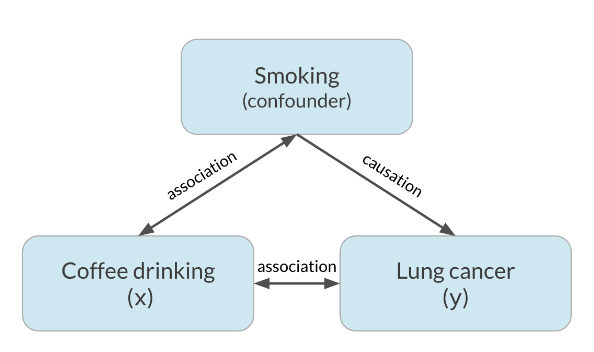

---
## Experiments

Experiments generally aim to answer a question in the form, *What is the effect of the **treatment** on the **response**?* In this setting, **treatment** refers to the explanatory or independent variable, and **response** refers to the response or dependent variable. 

### Controlled Experiments

Participants are assigned by researchers to either treatment group or control group.

Groups should be comparable so that causation can be inferred.

If the groups are not comparable it could lead to confounding (bias)

The gold standard of experiments will use:
- randomized controlled trial
- placebo
- double-blind trial

In general, the fewer opportunities for bias to creep in the experiment, the more reliable it will be about causation

## Observational studies

Paritcipants are not assigned randomly to groups

Many research questions cannot be answered with a controlled experiment.

Observational studies help stablishing causation but not causation

## Longitudinal vs Cross sectional studies

Longitudinal: participants are followed over a period of time to examine the effect of treatment on response. More expensive

Cross sectional study: data on participants is collected from a single snapshot in %time



